匯入套件

In [23]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy

plt.rcParams['font.family'] = ['Times New Roman']
English_fontcn = {'family': 'Times New Roman'}
Chinese_fontcn = {'family': 'DFKai-SB'}

讀檔

In [114]:
data = pd.read_csv('麥寮測站.csv') # 僅有10筆資料
data

,Time,PM10,Wind_Speed,Temperature,RH
0,2018/1/1 00:00,78,4.2,16.8,71
1,2018/1/1 01:00,71,3.2,16.7,71
2,2018/1/1 02:00,83,4.4,16.7,73
3,2018/1/1 03:00,70,3.5,16.7,74
4,2018/1/1 04:00,77,3.7,16.5,75
5,2018/1/1 05:00,95,4.3,16.3,76
6,2018/1/1 06:00,91,2.9,16.3,76
7,2018/1/1 07:00,85,3.8,16.6,76
8,2018/1/1 08:00,70,5.1,18.3,71
9,2018/1/1 09:00,69,6.4,19.5,69


# scikit-learn 套件

In [115]:
clusters_num = 3  # 群數設定為3

In [116]:
kmeans = KMeans(init='random', n_clusters=clusters_num, random_state=0)
data = data.iloc[:,1:].reset_index(drop=True)
kmeans.fit(data)
dist_list = kmeans.labels_

C:\Users\cma51\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cma51\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 手刻套件

- 產生各群初始中心點

In [119]:
def Generate_Initial_Cluster_Center(data, clusters_num=3):
    center_list = []
    for i in range(clusters_num):
        PM10 = random.uniform(data['PM10'].min(), data['PM10'].max())
        Wind_Speed = random.uniform(data['Wind_Speed'].min(), data['Wind_Speed'].max())
        Temperature = random.uniform(data['Temperature'].min(), data['Temperature'].max())
        RH = random.uniform(data['RH'].min(), data['RH'].max())
        center_list.append((PM10, Wind_Speed, Temperature, RH))
    return center_list

In [120]:
center = Generate_Initial_Cluster_Center(data, clusters_num)

- K-means 運作過程

In [122]:
new_center = copy.deepcopy(center)

while True:
    Cluster_values = []
    for i in range(len(data)):
        Dist = []
        for j in range(len(center)):
            Dist.append(math.dist(data.iloc[i,:].values, center[j]))
        Cluster_values.append(Dist.index(min(Dist)))
    for j in range(clusters_num):
        new_center[j] = tuple(data.iloc[np.where(np.array(Cluster_values)==j)[0], :].mean())
    if new_center == center:
        break
    else:
        center = copy.deepcopy(new_center)

In [123]:
dist_list  # scikit-learn 套件分群結果

array([1, 0, 1, 0, 1, 2, 2, 1, 0, 0])

In [124]:
Cluster_values  # 手刻套件分群結果

[1, 0, 1, 0, 1, 2, 2, 1, 0, 0]

驗證scikit-learn和手刻套件的結果

- 透過混淆矩陣評估績效
- dist_list：scikit-learn 套件測試結果
- Cluster_values：手刻套件測試結果

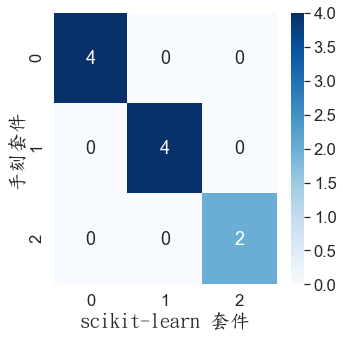

In [125]:
confusion_mtx = confusion_matrix(Cluster_values, dist_list) 
sns.set(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mtx, cmap='Blues',annot=True, fmt='g')
plt.xlabel('scikit-learn 套件',fontsize=20,fontdict=Chinese_fontcn)
plt.ylabel('手刻套件',fontsize=20,fontdict=Chinese_fontcn)
plt.show() 